In [10]:
import os
import cv2

In [11]:
features=[]
target=[]
for x in range(0,43):
    ImagesNamesList=os.listdir("D:/Datasets/TrafficSign" + "/" + str(x))
    for y in ImagesNamesList:
        Imgarr=cv2.imread("D:/Datasets/TrafficSign" + "/" + str(x) + "/" + y)
        features.append(Imgarr)
        target.append(x)
    print("In Folder",x)

In Folder 0
In Folder 1
In Folder 2
In Folder 3
In Folder 4
In Folder 5
In Folder 6
In Folder 7
In Folder 8
In Folder 9
In Folder 10
In Folder 11
In Folder 12
In Folder 13
In Folder 14
In Folder 15
In Folder 16
In Folder 17
In Folder 18
In Folder 19
In Folder 20
In Folder 21
In Folder 22
In Folder 23
In Folder 24
In Folder 25
In Folder 26
In Folder 27
In Folder 28
In Folder 29
In Folder 30
In Folder 31
In Folder 32
In Folder 33
In Folder 34
In Folder 35
In Folder 36
In Folder 37
In Folder 38
In Folder 39
In Folder 40
In Folder 41
In Folder 42


In [12]:
import numpy as np
features=np.array(features)
target=np.array(target)


In [5]:
features.shape

(34799, 32, 32, 3)

In [6]:
target.shape

(34799,)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2)

In [9]:
features_train.shape

(27839, 32, 32, 3)

In [10]:
features_test.shape

(6960, 32, 32, 3)

In [11]:
target_train.shape

(27839,)

In [12]:
target_test.shape

(6960,)

In [16]:
def preprocessing(image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=image/255
    return image

In [14]:
features_train=np.array(list(map(preprocessing,features_train)))

In [15]:
features_train.shape

(27839, 32, 32)

In [16]:
features_train=features_train.reshape(27839,32,32,1)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
dataGen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,zoom_range=0.2)

In [19]:
dataGen.fit(features_train)

In [20]:
batches=dataGen.flow(features_train,target_train,batch_size=20)

In [21]:
len(batches)

1392

In [22]:
images,labels=next(batches)

In [23]:
images.shape

(20, 32, 32, 1)

In [24]:
images=images.reshape(20,32,32)

In [25]:
import matplotlib.pyplot as plt

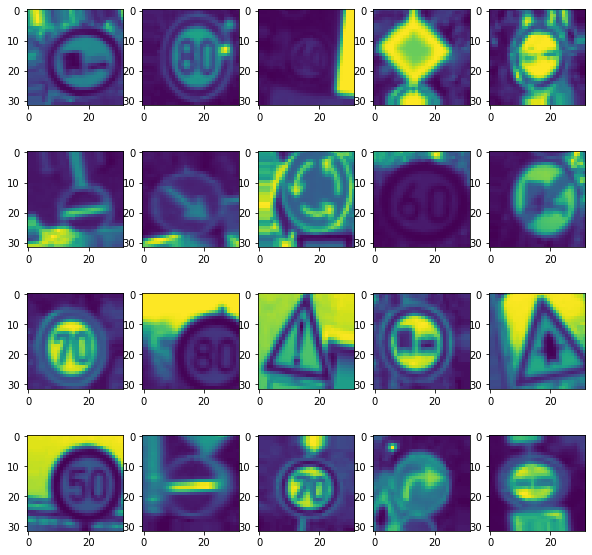

In [26]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(images[i])
plt.show()

In [30]:
from tensorflow.keras.utils import to_categorical
target_train=to_categorical(target_train)
target_train.shape

(27839, 43)

In [28]:
features_train.shape

(27839, 32, 32, 1)

In [19]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential

In [20]:
model=Sequential()
model.add(Conv2D(60,(3,3),activation="relu",input_shape=(32,32,1)))
model.add(Conv2D(60,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(30,(3,3),activation="relu"))
model.add(Conv2D(30,(3,3),activation="relu"))
model.add(Conv2D(30,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(43,activation="softmax"))

In [21]:
from tensorflow.keras.optimizers import Adam

In [26]:
model.compile(Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [33]:
model.fit_generator(dataGen.flow(features_train,target_train,batch_size=20),epochs=20)

E:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1392/1392 [==============================] - 84s 60ms/step - loss: 2.0138 - accuracy: 0.4253
Epoch 2/20
1392/1392 [==============================] - 85s 61ms/step - loss: 0.6697 - accuracy: 0.7933
Epoch 3/20
1392/1392 [==============================] - 89s 64ms/step - loss: 0.4245 - accuracy: 0.8673
Epoch 4/20
1392/1392 [==============================] - 87s 62ms/step - loss: 0.3182 - accuracy: 0.9016
Epoch 5/20
1392/1392 [==============================] - 83s 60ms/step - loss: 0.2603 - accuracy: 0.9207
Epoch 6/20
1392/1392 [==============================] - 81s 58ms/step - loss: 0.2229 - accuracy: 0.9315
Epoch 7/20
1392/1392 [==============================] - 81s 58ms/step - loss: 0.2071 - accuracy: 0.9357
Epoch 8/20
1392/1392 [==============================] - 79s 57ms/step - loss: 0.1739 - accuracy: 0.9463
Epoch 9/20
1392/1392 [==============================] - 76s 55ms/step - loss: 0.1667 - accuracy: 0.9483
Epoch 10/20
1392/1392 [==============================] - 77s 55m

In [34]:
ModelToJSON=model.to_json()

In [35]:
obj=open("D:/Datasets/TrafficSignModel.json","w")
obj.write(ModelToJSON)
obj.close()

In [36]:
model.save_weights("D:/Datasets/TraffinSignWeights.h5")

FOR LOADING A MODEL ALREADY SAVED

In [23]:
from tensorflow.keras.models import model_from_json
abc=open("D:/Datasets/TrafficSignModel.json","r")
loaded_data=abc.read()
model=model_from_json(loaded_data)
model.load_weights("D:/Datasets/TraffinSignWeights.h5")

In [24]:
features_test=np.array(list(map(preprocessing,features_test)))
features_test=features_test.reshape(6960,32,32,1)

In [38]:
predictions=model.predict(features_test)

In [31]:
target_test=to_categorical(target_test)

In [4]:
capt=cv2.VideoCapture(0)
capt.set(3,640)
capt.set(4,480)
capt.set(10,180)

False

In [5]:
def getClassName(classNo):
    if classNo==0: return 'Speed Limit 20 Km/h'
    elif classNo==1: return 'Speed Limit 30 Km/h'
    elif classNo==2: return 'Speed Limit 50 Km/h'
    elif classNo==3: return 'Speed Limit 60 Km/h'
    elif classNo==4: return 'Speed Limit 70 Km/h'
    elif classNo==5: return 'Speed Limit 80 Km/h'
    elif classNo==6: return 'End of Speed Limit 80 Km/h'
    elif classNo==7: return 'Speed Limit 100 Km/h'
    elif classNo==8: return 'Speed Limit 120 Km/h'
    elif classNo==9: return 'No passing'
    elif classNo==10: return 'No passing for vehicles over 3.5 metric tons'
    elif classNo==11: return 'Right-of-way at the next intersection'
    elif classNo==12: return 'Priority road'
    elif classNo==13: return 'Yield'
    elif classNo==14: return 'Stop'
    elif classNo==15: return 'No vehicles'
    elif classNo==16: return 'Vehicles over 3.5 metric tons prohibited'
    elif classNo==17: return 'No entry'
    elif classNo==18: return 'General caution'
    elif classNo==19: return 'Dangerous curve to the left'
    elif classNo==20: return 'Dangerous curve to the right'
    elif classNo==21: return 'Double curve'
    elif classNo==22: return 'Bumpy road'
    elif classNo==23: return 'Slippery road'
    elif classNo==24: return 'Road narrows on the right'
    elif classNo==25: return 'Road work'
    elif classNo==26: return 'Traffic signal'
    elif classNo==27: return 'Pedestrians'
    elif classNo==28: return 'Children crossing'
    elif classNo==29: return 'Bicycles crossing'
    elif classNo==30: return 'Beaware of ice/snow'
    elif classNo==31: return 'Wild animals crossing'
    elif classNo==32: return 'End of all speed and passing limits'
    elif classNo==33: return 'Turn right ahead'
    elif classNo==34: return 'Turn left ahead'
    elif classNo==35: return 'Ahead only'
    elif classNo==36: return 'Go straight or right'
    elif classNo==37: return 'Go straight or left'
    elif classNo==38: return 'Keep right'
    elif classNo==39: return 'Keep left'
    elif classNo==40: return 'Roundabout mandatory'
    elif classNo==41: return 'End of no passing'
    elif classNo==42: return 'End of no passing by vehicles over 3.5 metric tons'

In [9]:
while True:
    message,image=capt.read()
    imagearr=np.asarray(image)
    imagearr=cv2.resize(imagearr,(32,32))
    imagearr=preprocessing(imagearr)
    imagearr=imagearr.reshape(1,32,32,1)
    predictions=model.predict(imagearr)
    NeuronIndex=model.predict_classes(imagearr)
    cv2.putText(image,"Class: ",(20,35),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    cv2.putText(image,"Probability: ",(20,75),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    probabilityValue=np.amax(predictions)
    if probabilityValue>=0.75:
        cv2.putText(image,getClassName(NeuronIndex),(120,35),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
        cv2.putText(image,str(probabilityValue*100)+"%",(200,75),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    cv2.imshow("Model Prediction",image)
    AsciiValue=cv2.waitKey(1)
    if AsciiValue==ord('s'):
        cv2.destroyAllWindows()
        break

E:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [8]:
import numpy as np

In [32]:
test_loss,test_acc=model.evaluate(features_test,target_test,verbose=2)

ValueError: Creating variables on a non-first call to a function decorated with tf.function.